# Brownian motion (as a stochastic process)
## Tirthajyoti Sarkar, Fremont, CA, July 2020

## What is Brownian motion?

### Physical origin and properties
Brownian motion, or pedesis, is the random motion of particles suspended in a fluid (a liquid or a gas) resulting from their collision with the fast-moving molecules in the fluid.

This pattern describes a fluid at [thermal equilibrium](https://en.wikipedia.org/wiki/Thermal_equilibrium), defined by a given temperature. Within such a fluid, there exists no preferential direction of flow (as in [transport phenomena](https://en.wikipedia.org/wiki/Transport_phenomena)). More specifically, the fluid's overall linear and angular momenta remain null over time. 

The kinetic energies of the molecular Brownian motions, together with those of molecular rotations and vibrations, sum up to the caloric component of a fluid's [internal energy](https://en.wikipedia.org/wiki/Internal_energy).

### Discovery and early explanations

This motion is named after the botanist [Robert Brown](https://en.wikipedia.org/wiki/Robert_Brown_(botanist,_born_1773)), who first described the phenomenon in 1827, while looking through a microscope at pollen of the plant Clarkia pulchella immersed in water. 

In 1905, almost eighty years later, theoretical physicist **[Albert Einstein](https://en.wikipedia.org/wiki/Albert_Einstein) published [a seminal paper](http://www.maths.usyd.edu.au/u/UG/SM/MATH3075/r/Einstein_1905.pdf)** where he modeled the motion of the pollen as being moved by individual water molecules, making one of his first major scientific contributions. This explanation of Brownian motion **served as convincing evidence that atoms and molecules exist** and was further verified experimentally by [Jean Perrin](https://en.wikipedia.org/wiki/Jean_Baptiste_Perrin) in 1908.

Also read this [enjoyable paper commemorating the 100-year of Einstein's paper](https://arxiv.org/pdf/cond-mat/0504610.pdf).

## Brownian motion as a stochastic process
### Many-body interaction

The many-body interactions that yield the Brownian pattern cannot be solved by a model accounting for every involved molecule. In consequence, only probabilistic models applied to molecular populations can be employed to describe it. This is why it is described as a purely stochastic process in its modern form and applications.

### Weiner process
In mathematics, the Wiener process is a real valued continuous-time stochastic process named in honor of American mathematician [Norbert Wiener](https://en.wikipedia.org/wiki/Norbert_Wiener) for his investigations on the mathematical properties of the one-dimensional Brownian motion.

It is one of the best known stochastic processes with [stationary](https://en.wikipedia.org/wiki/Stationary_process) [independent increments](https://en.wikipedia.org/wiki/Independent_increments) and find frequent applications in a wide range of fields covering pure and applied mathematics, economics, quantitative finance, evolutionary biology, and physics. 

For example, it plays a vital role in [stochastic calculus](https://en.wikipedia.org/wiki/Stochastic_calculus), [diffusion processes](https://en.wikipedia.org/wiki/Diffusion_process) and even [potential theory](https://en.wikipedia.org/wiki/Diffusion_process).  In applied mathematics, the Wiener process is used to represent the integral of a white noise [Gaussian process](https://en.wikipedia.org/wiki/Gaussian_process), and so is useful as a model of **noise in electronics engineering (see [Brownian noise](https://en.wikipedia.org/wiki/Brownian_noise))**, instrument errors in filtering theory and unknown forces in control theory.

In physics, it is used to study Brownian motion, the diffusion of minute particles suspended in fluid, and other types of diffusion via the [Fokker–Planck](https://en.wikipedia.org/wiki/Fokker%E2%80%93Planck_equation) and [Langevin equations](https://en.wikipedia.org/wiki/Langevin_equation). It also forms the basis for the rigorous path [integral formulation](https://en.wikipedia.org/wiki/Path_integral_formulation) of quantum mechanics (by the [Feynman–Kac formula](https://en.wikipedia.org/wiki/Feynman%E2%80%93Kac_formula), a solution to the Schrödinger equation can be represented in terms of the Wiener process) and the study of [eternal inflation](https://en.wikipedia.org/wiki/Eternal_inflation) in physical cosmology. It is also prominent in the mathematical theory of finance, in particular the **[Black–Scholes](https://en.wikipedia.org/wiki/Black%E2%80%93Scholes) option pricing model**.

## A `Brownian` class

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def stock_price(
                    self,
                    s0=100,
                    mu=0.2,
                    sigma=0.68,
                    deltaT=52,
                    dt=0.1
                    ):
        """
        Models a stock price S(t) using the Weiner process W(t) as
        `S(t) = S(0).exp{(mu-(sigma^2/2).t)+sigma.W(t)}`
        
        Arguments:
            s0: Iniital stock price, default 100
            mu: 'Drift' of the stock (upwards or downwards), default 1
            sigma: 'Volatility' of the stock, default 1
            deltaT: The time period for which the future prices are computed, default 52 (as in 52 weeks)
            dt (optional): The granularity of the time-period, default 0.1
        
        Returns:
            s: A NumPy array with the simulated stock prices over the time-period deltaT
        """
        n_step = int(deltaT/dt)
        time_vector = np.linspace(0,deltaT,num=n_step)
        # Stock variation
        stock_var = (mu-(sigma**2/2))*time_vector
        # Forcefully set the initial value to zero for the stock price simulation
        self.x0=0
        # Weiner process (calls the `gen_normal` method)
        weiner_process = sigma*self.gen_normal(n_step)
        # Add two time series, take exponent, and multiply by the initial stock price
        s = s0*(np.exp(stock_var+weiner_process))
        
        return s

### Process with initial value of zero and using random walk

In [30]:
b = Brownian()

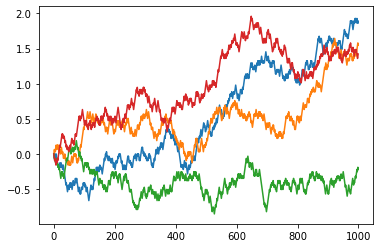

In [31]:
for i in range(4):
    plt.plot(b.gen_random_walk(1000))
plt.show()

### Process with initial value of 20 and using $Nor(\mu,\sigma^2)$ process

In [32]:
b = Brownian(20)

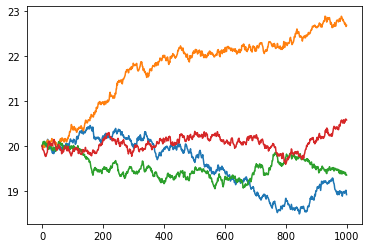

In [33]:
for i in range(4):
    plt.plot(b.gen_normal(1000))
plt.show()

### Stock price simulation (multiple scenarios) with $\mu=0.2, \sigma=0.68$ for 52 time periods (like 52 weeks a year)

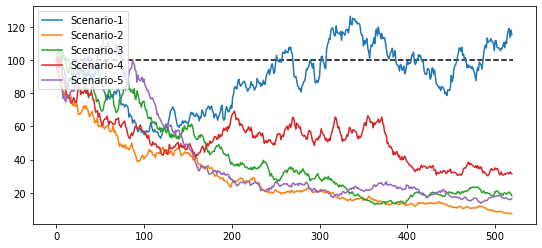

In [25]:
plt.figure(figsize=(9,4))
for i in range(5):
    plt.plot(b.stock_price(mu=0.2,sigma=0.68,dt=0.1))
plt.legend(['Scenario-'+str(i) for i in range(1,6)],loc='upper left')
plt.hlines(y=100,xmin=0,xmax=520,linestyle='--',color='k')
plt.show()

### Two-dimensional plot

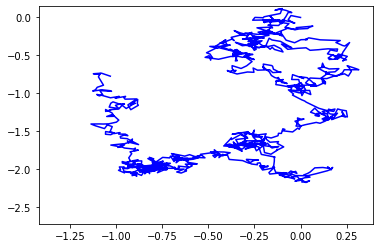

In [34]:
b1 = Brownian()
b2 = Brownian()

x = b1.gen_normal(1000)
y = b2.gen_normal(1000)

plt.plot(x,y,c='b')
xmax,xmin,ymax,ymin = x.max(),x.min(),y.max(),y.min()
scale_factor = 1.25
xmax,xmin,ymax,ymin = xmax*scale_factor,xmin*scale_factor,ymax*scale_factor,ymin*scale_factor
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()